In [1]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)

<<<<<<< local
Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ─────────────────────────────────────────

# GROUP PROPOSAL: WINE TASTING

## Introduction

- Wine quality highly depends on its composition of various aromatic compounds. By assessing the content of wines such as their sugar content and pH value, we will be able to determine how good the wine is. 
- In this project, we will be using the wine quality dataset obtained from a web URL.
- We want to solve **classification problem** —- what would be the wine’s quality level given its values on the fixed acidity, volatile acidity, and other variables.
-  7 out of the 12 variables are used to predict the **wine quality**, which ranges from 0 to 10, with 10 being the highest quality wine.


## Preliminary exploratory data analysis

**1. Data Reading**

In [2]:
temp <- tempfile()
download_file <- download.file("https://archive.ics.uci.edu/static/public/186/wine+quality.zip", temp)
red_wine <- read.csv2(unz(temp, "winequality-red.csv")) |>
             mutate(type = "Red")
white_wine <- read.csv2(unz(temp, "winequality-white.csv")) |>
              mutate(type ="White")
head(red_wine)
head(white_wine)
unlink(temp)

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1 7.4           0.7              0           1.9            0.076    
2 7.8           0.88             0           2.6            0.098    
3 7.8           0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5 7.4           0.7              0           1.9            0.076    
6 7.4           0.66             0           1.8            0.075    
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.2  0.68      9.8    
3 15                  54                   0.997   3.26 0.65      9.8    
4 17                  60                   0.998   3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
6 13                  40                   0.9978  3.51 0.56      9.4    
  quality type
1 5       Red 
2 5       Red 
3 5       Red 
4 6       Red 
5 5       Red 
6 5       Red

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1 7             0.27             0.36        20.7           0.045    
2 6.3           0.3              0.34        1.6            0.049    
3 8.1           0.28             0.4         6.9            0.05     
4 7.2           0.23             0.32        8.5            0.058    
5 7.2           0.23             0.32        8.5            0.058    
6 8.1           0.28             0.4         6.9            0.05     
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 45                  170                  1.001   3    0.45      8.8    
2 14                  132                  0.994   3.3  0.49      9.5    
3 30                  97                   0.9951  3.26 0.44      10.1   
4 47                  186                  0.9956  3.19 0.4       9.9    
5 47                  186                  0.9956  3.19 0.4       9.9    
6 30                  97                   0.9951  3.26 0.44      10.1   
  quality type 
1 6       White
2 6       White
3 6       White
4 6       White
5 6       White
6 6       White

**2. Data Wrangling**

In [3]:
wine_data <- rbind(red_wine, white_wine) |>
             mutate(across(fixed.acidity:alcohol, as.numeric), quality = as_factor(quality),
                   type = as_factor(type))
write_csv(wine_data, "../data/wine_data.csv")
head(wine_data)

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
6  7.4          0.66             0.00        1.8            0.075    
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
6 13                  40                   0.9978  3.51 0.56      9.4    
  quality type
1 5       Red 
2 5       Red 
3 5       Red 
4 6       Red 
5 5       Red 
6 5       Red

**3. Data Splitting**

In [4]:
set.seed(2000)
wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

**4. Summarization**

**a. The number of observations in each red wine/white wine class**

In [5]:
wine_type_number <- wine_training |>
                    group_by(type) |>
                    summarize(Number = n())
wine_type_number

type  Number
1 Red   1204  
2 White 3667

- We have 4898 observations for White wine and 1599 observations for Red wine.
- There is an imbalance between the types of the wine. 

**b. The number of observations for each quality level.**

In [6]:
quality_number <- wine_training |>
                  group_by(quality) |>
                  summarize(Number = n())
quality_number

quality Number
1 3         24  
2 4        166  
3 5       1602  
4 6       2123  
5 7        814  
6 8        138  
7 9          4

- We are missing two classes: 0, 1, 2 and 10.
- This is another class imbalance existed within the class

**c. Mean value of each measurements for different quality type.**

In [7]:
mean_measurements <- wine_training |>
                     group_by(quality) |>
                     summarize(mean_fixed_acidity = mean(fixed.acidity),
                               mean_volatile_acidity = mean(volatile.acidity),
                               mean_citric_acid = mean(citric.acid),
                               mean_residual_sugar = mean(residual.sugar),
                               mean_chlorides = mean(chlorides),
                               mean_free_sufdioxide = mean(free.sulfur.dioxide),
                               mean_tot_sufdioxide = mean(total.sulfur.dioxide),
                               mean_density = mean(density),
                               mean_ph = mean(pH),
                               mean_sulphates = mean(sulphates),
                               mean_alcohol = mean(alcohol))
mean_measurements

quality mean_fixed_acidity mean_volatile_acidity mean_citric_acid
1 3       7.691667           0.5508333             0.2691667       
2 4       7.228313           0.4607229             0.2688554       
3 5       7.329650           0.3903059             0.3072472       
4 6       7.177932           0.3154169             0.3211823       
5 7       7.086978           0.2861548             0.3318182       
6 8       6.795652           0.2953261             0.3239130       
7 9       7.000000           0.3050000             0.3700000       
  mean_residual_sugar mean_chlorides mean_free_sufdioxide mean_tot_sufdioxide
1 4.175000            0.08358333     37.83333             106.0625           
2 4.157831            0.06107229     20.98494             104.0753           
3 5.791386            0.06469975     30.53620             121.2871           
4 5.620066            0.05453132     31.30664             115.3457           
5 4.740111            0.04485012     30.39435             108.0682           
6 5.638043            0.04083333     35.31884             120.9058           
7 2.500000            0.02550000     34.75000             114.0000           
  mean_density mean_ph  mean_sulphates mean_alcohol
1 0.9957779    3.295833 0.5241667      10.093750   
2 0.9948237    3.238855 0.4960843      10.174096   
3 0.9958513    3.209782 0.5262360       9.842258   
4 0.9946097    3.218031 0.5326189      10.575820   
5 0.9930359    3.227826 0.5438084      11.414742   
6 0.9926056    3.222319 0.5135507      11.650000   
7 0.9900750    3.335000 0.4675000      12.625000

The ranges of the mean are different across different columns hence the variables will need to be scaled 

**d. Missing data - We have no missing data in this dataset.**

**4. Visualization: histogram between quality and other numeric variables**

<<<<<<< local


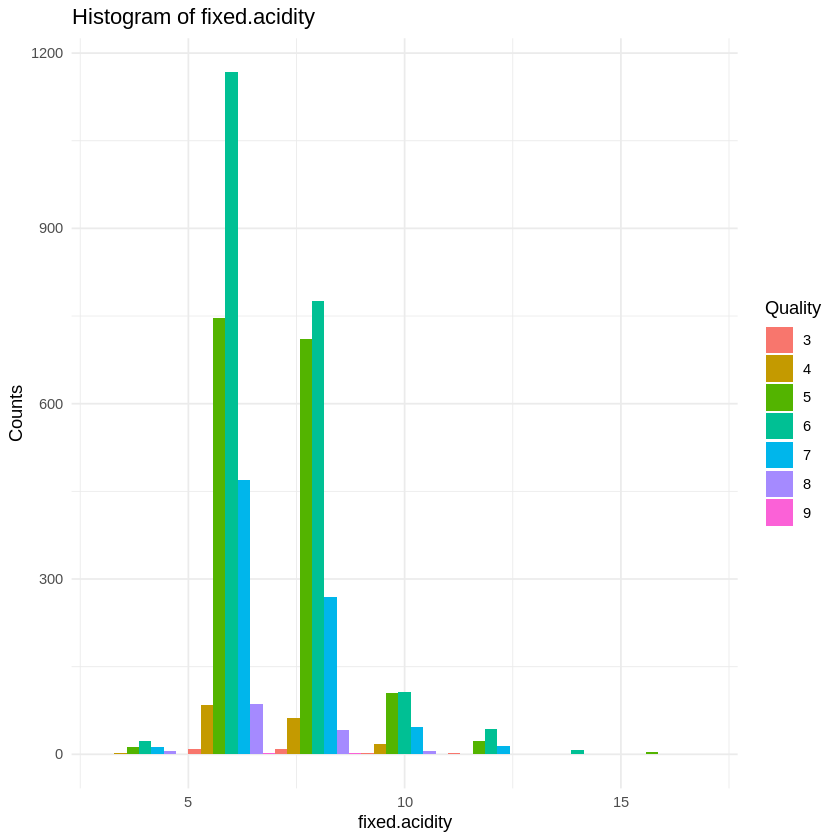

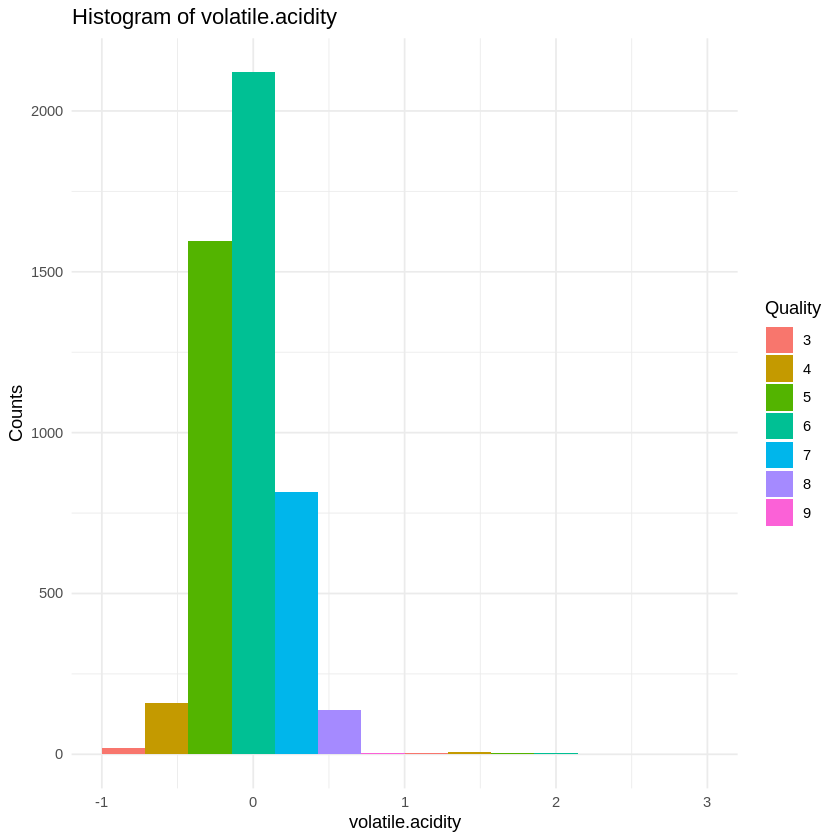

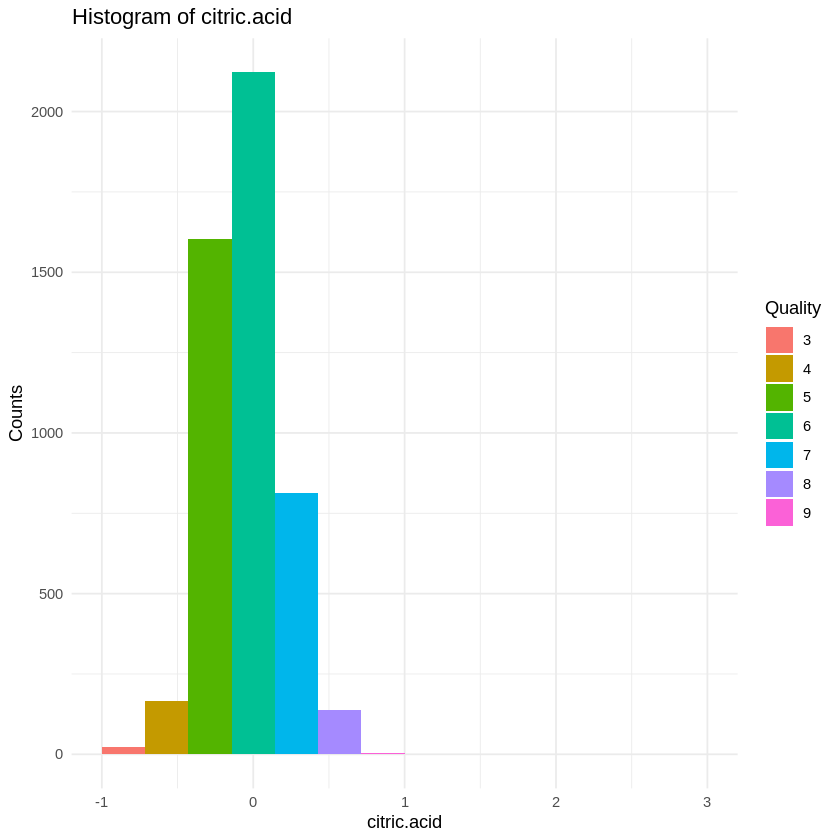

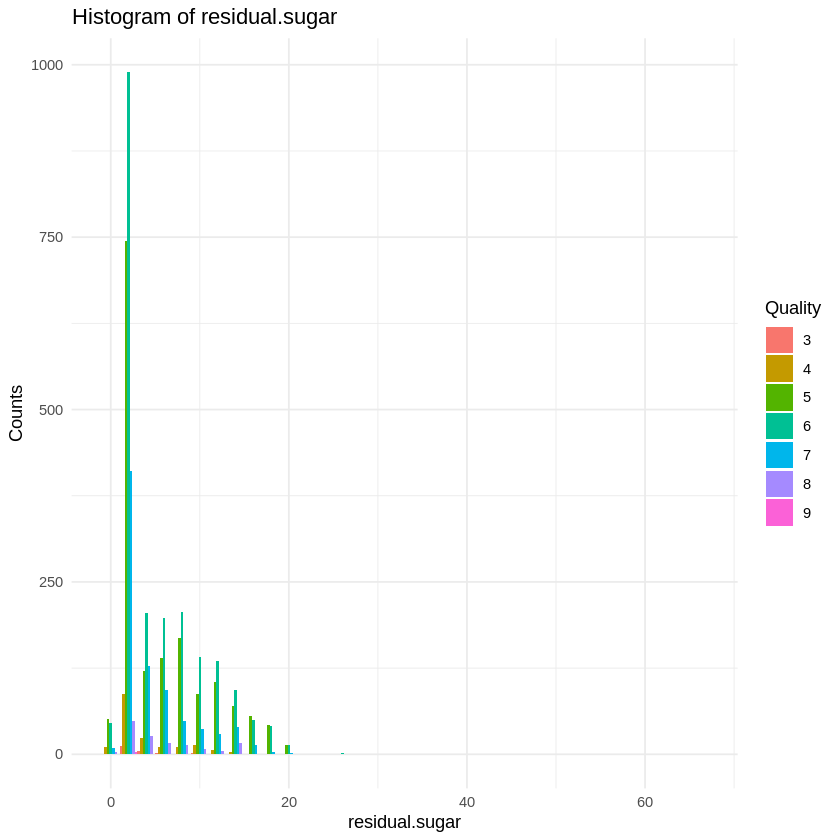

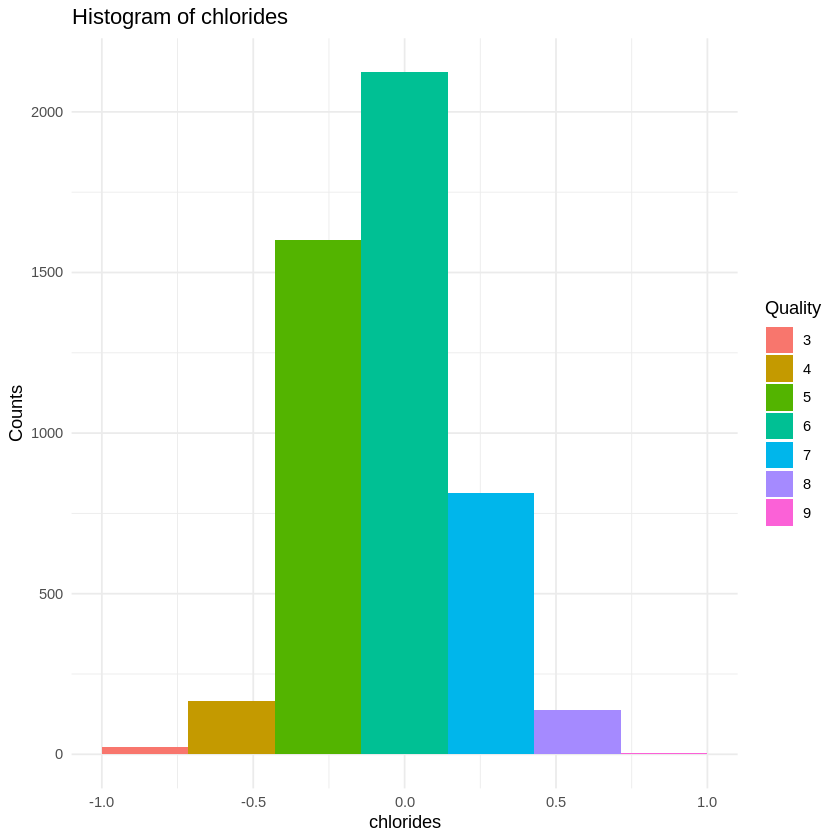

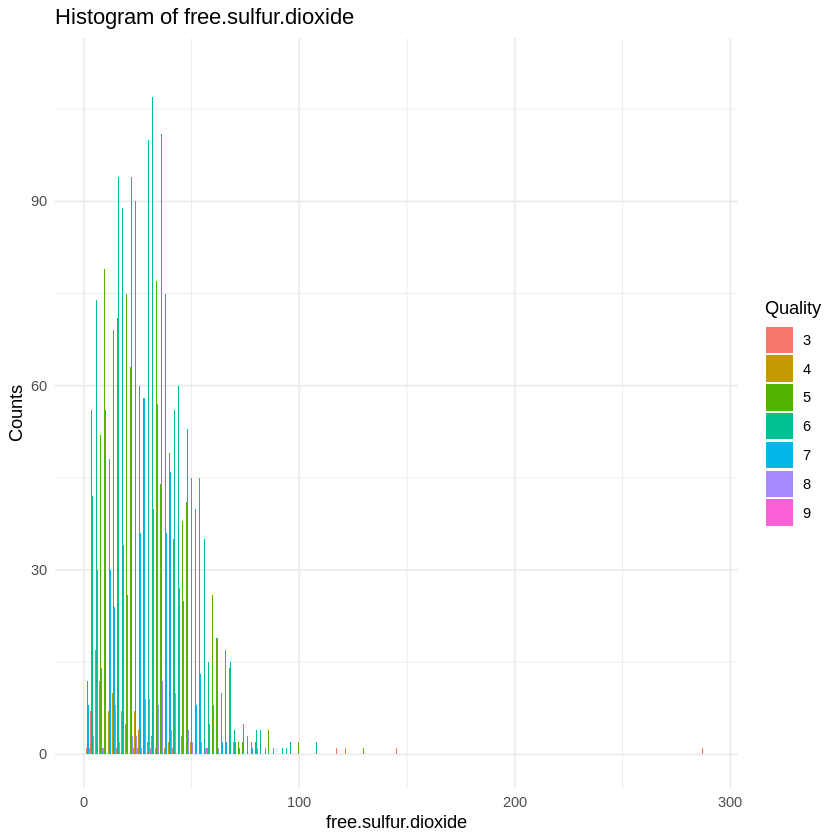

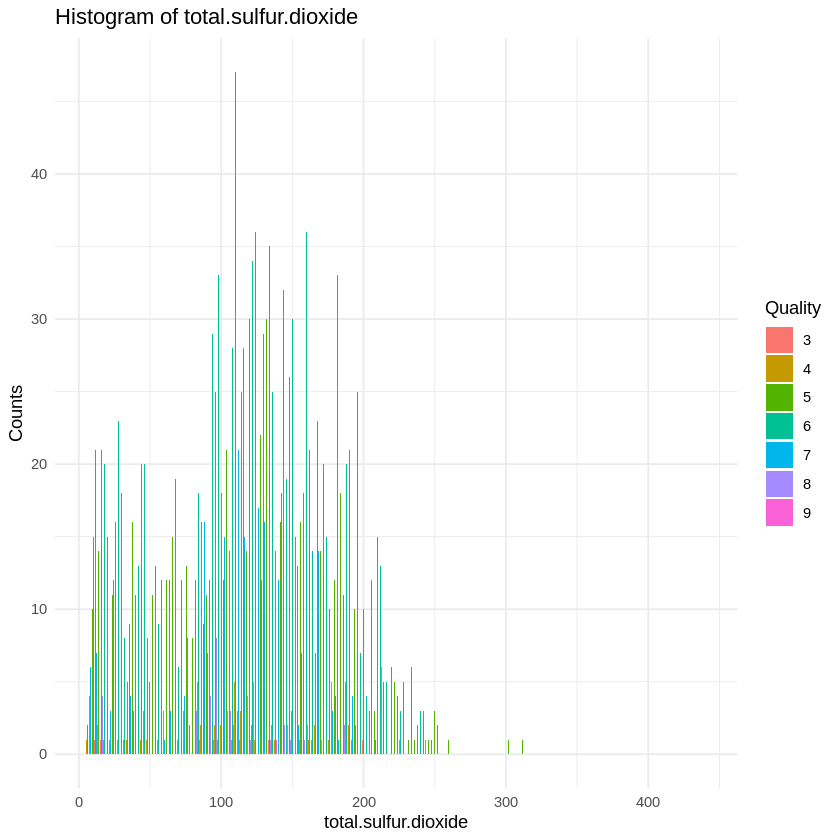

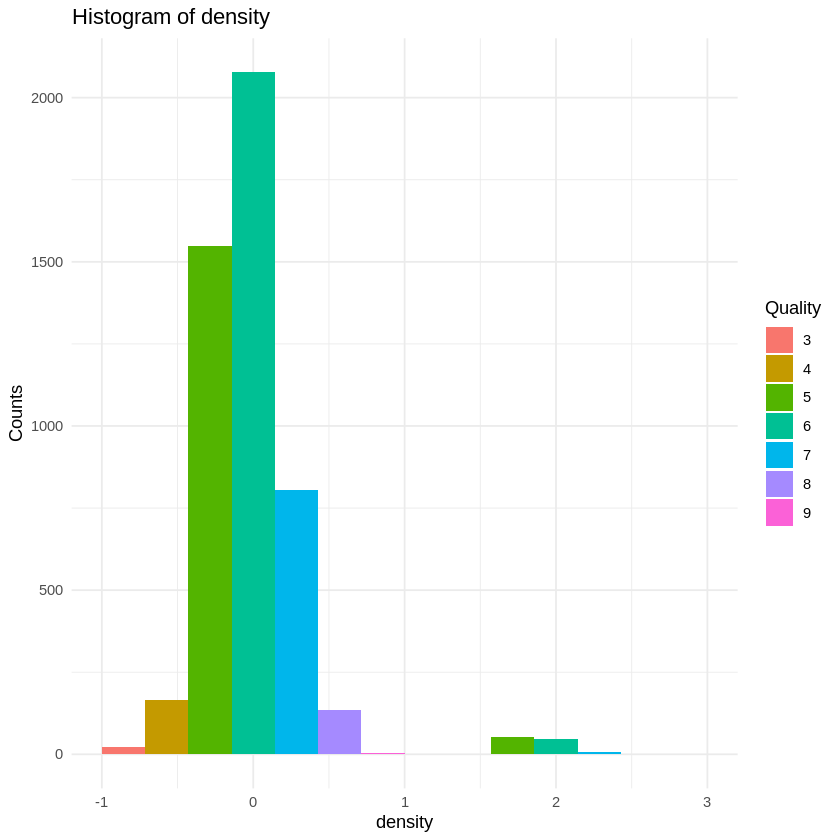

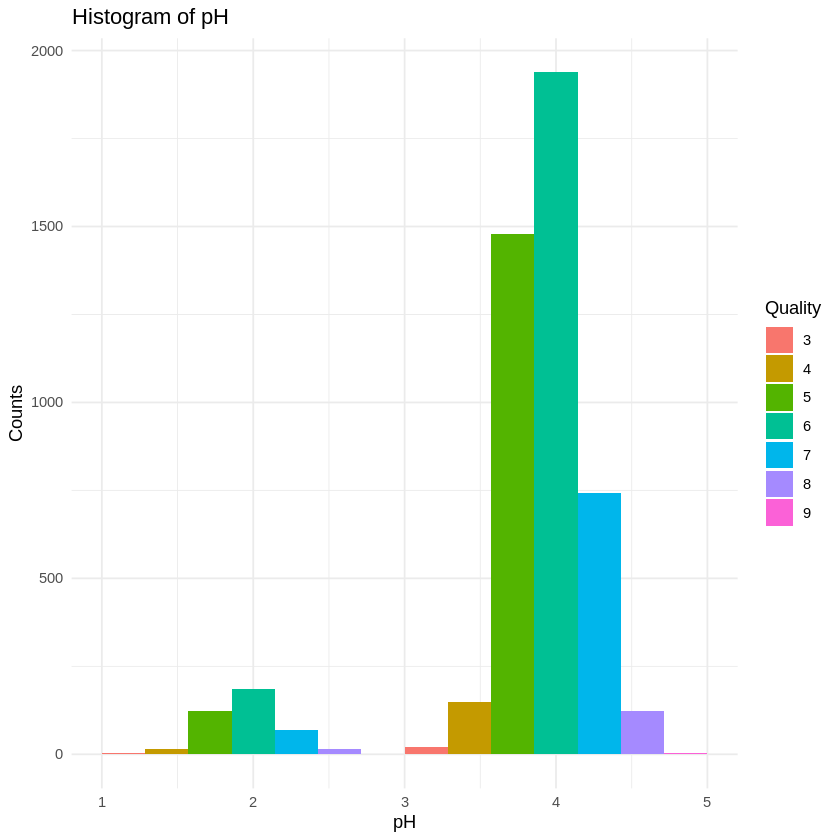

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]


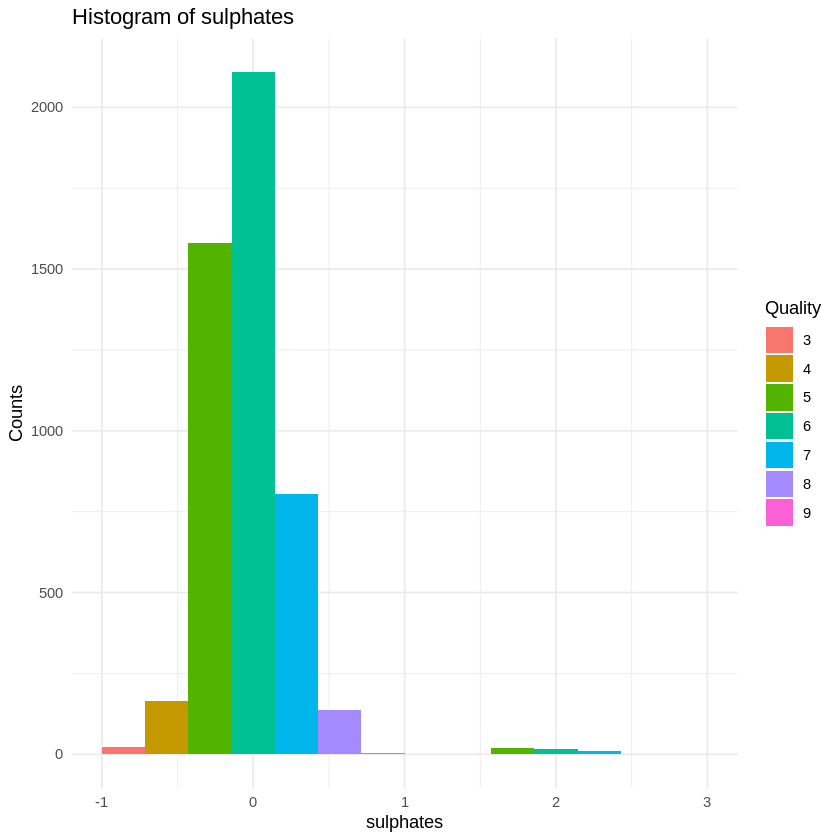

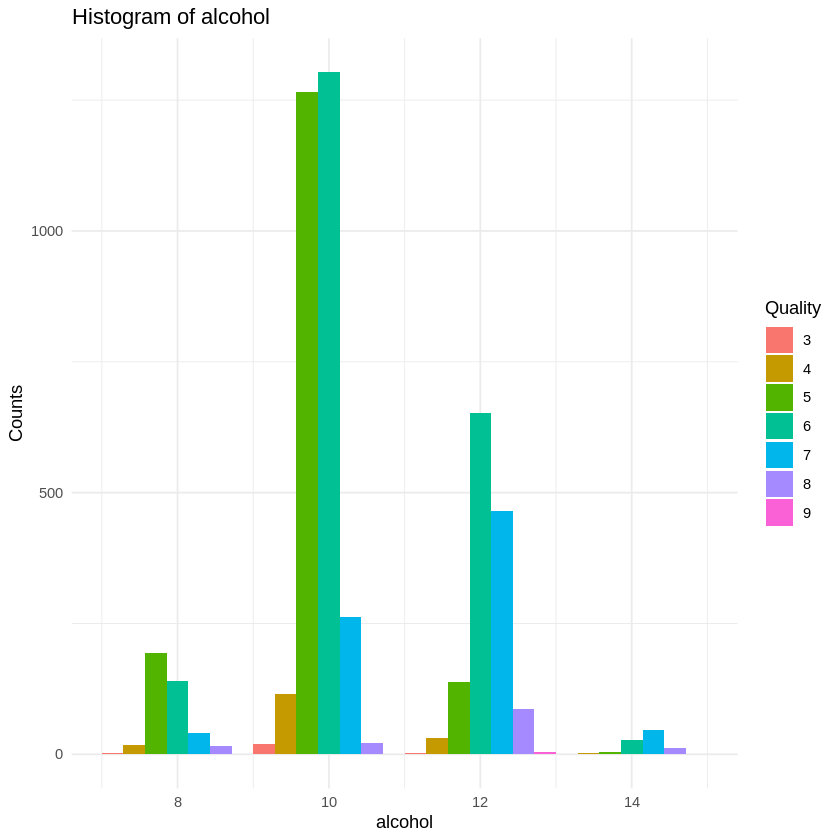

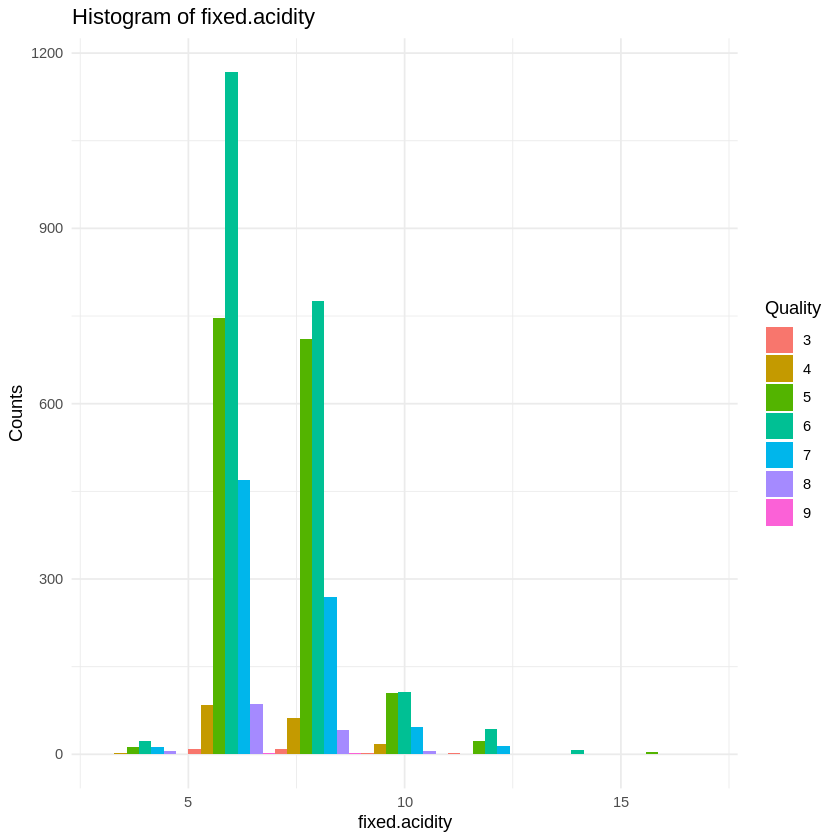

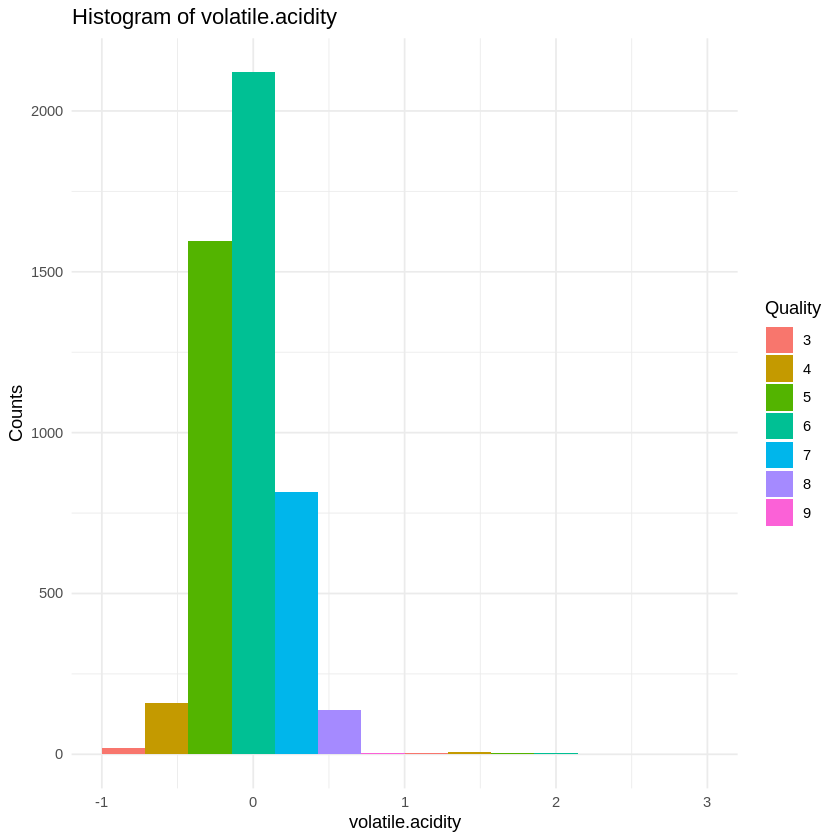

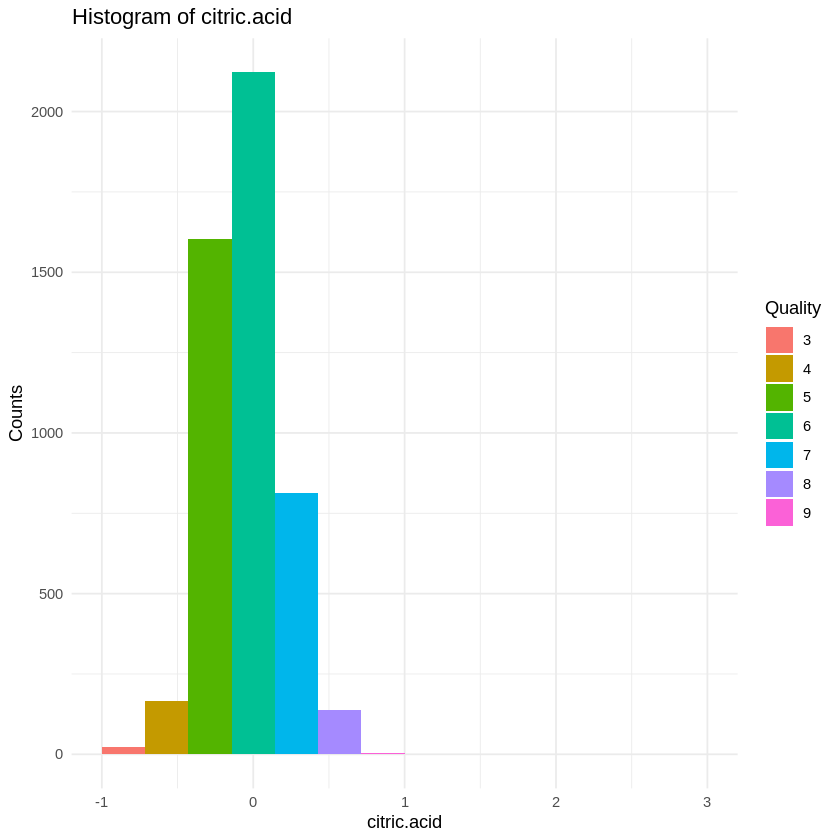

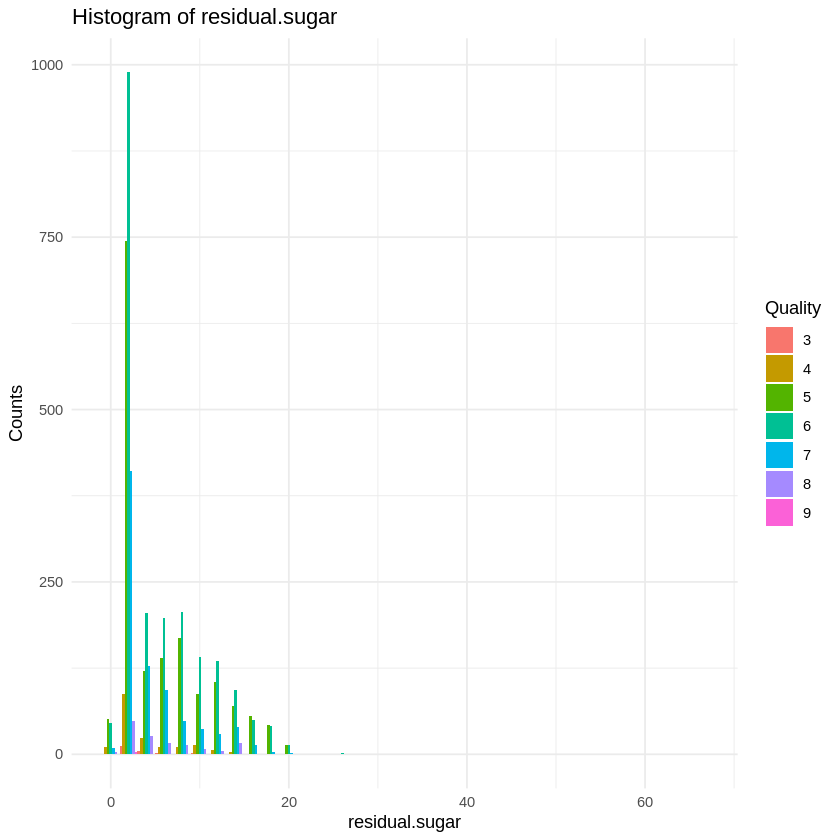

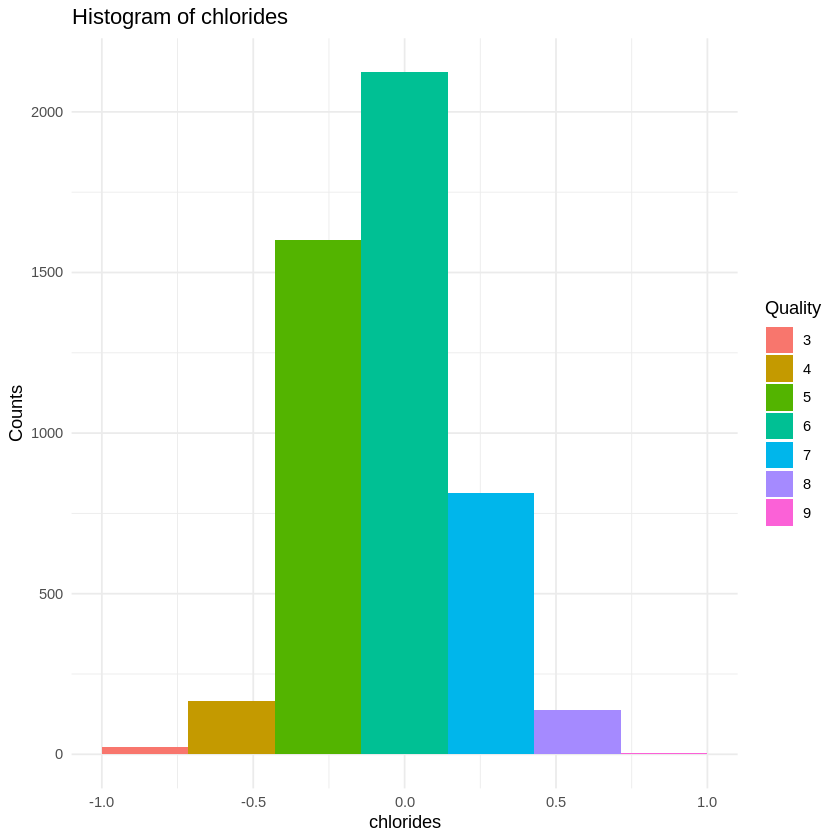

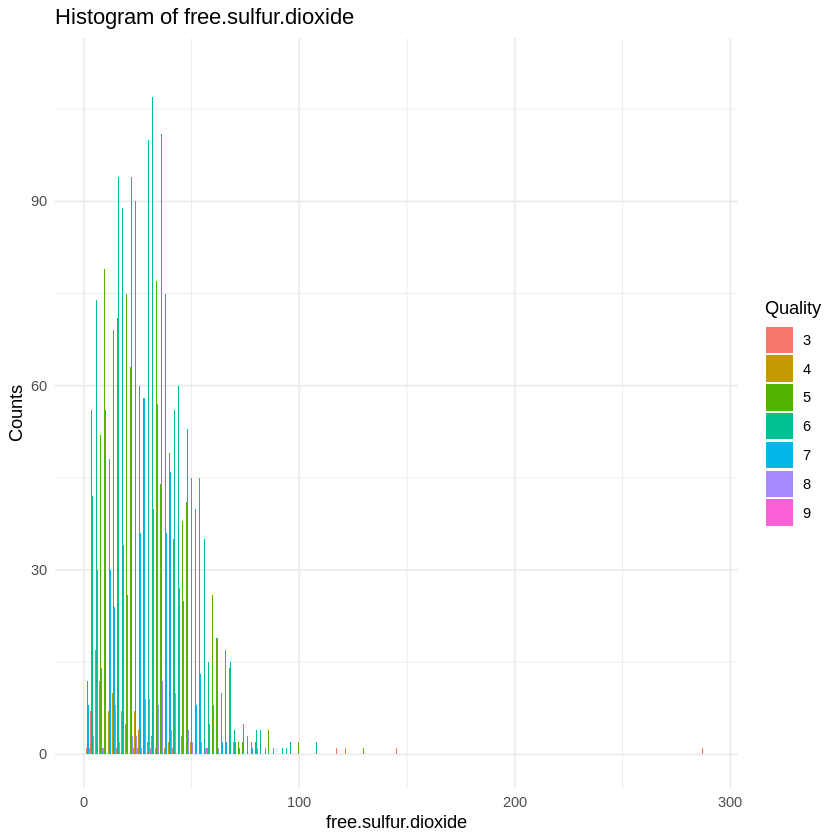

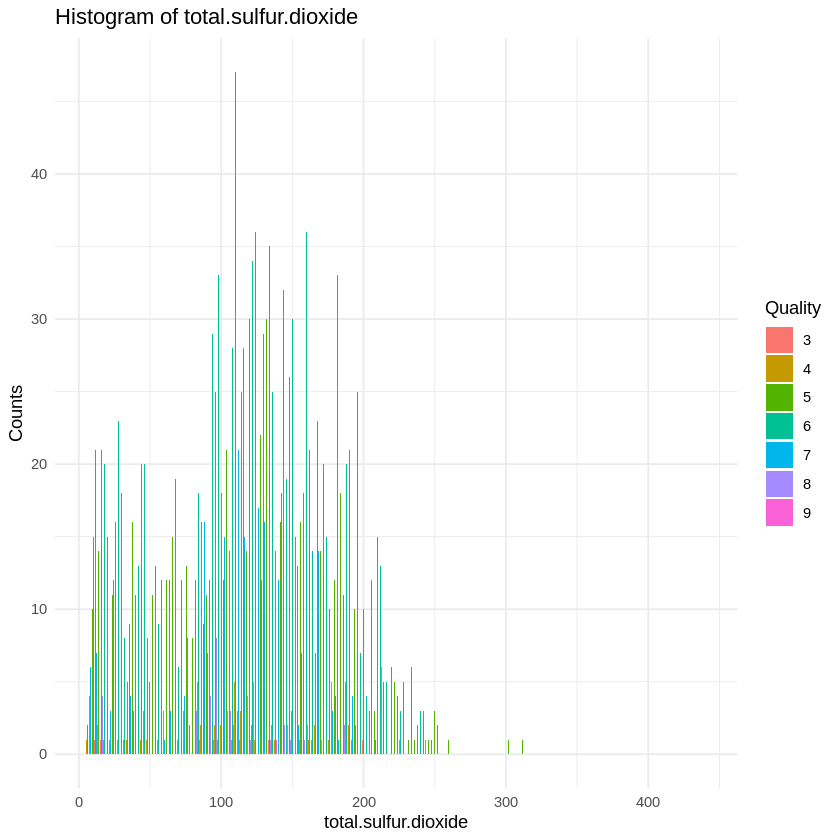

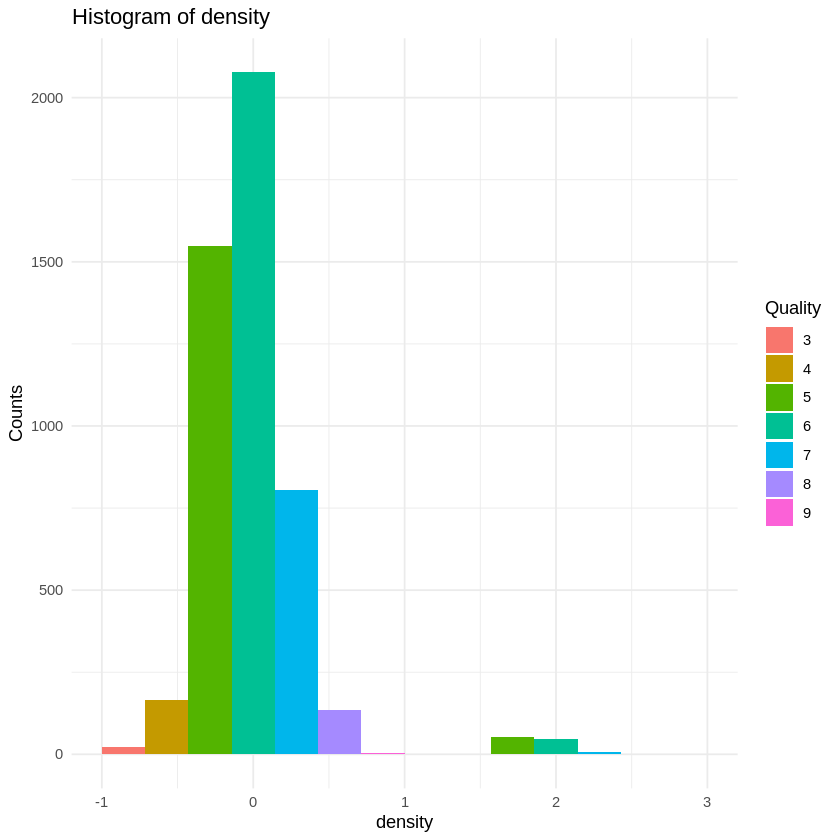

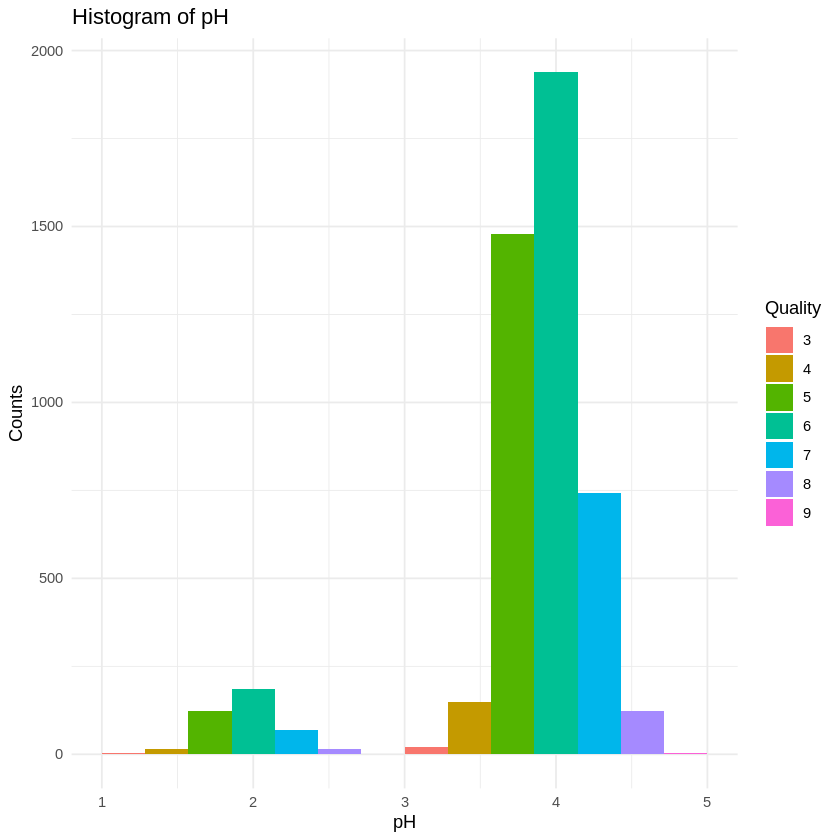

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]


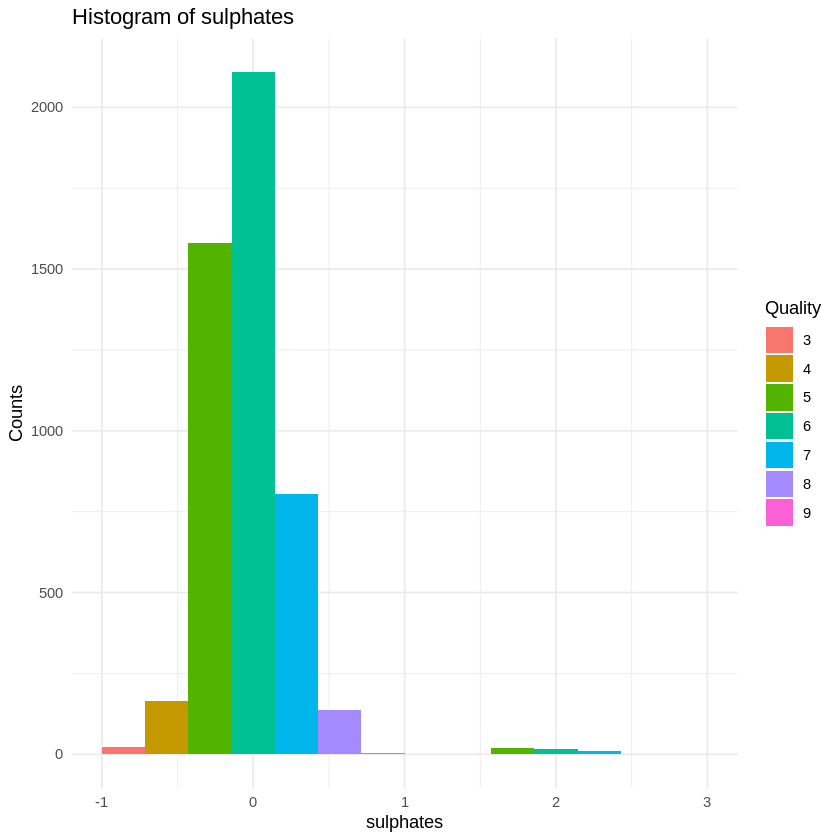

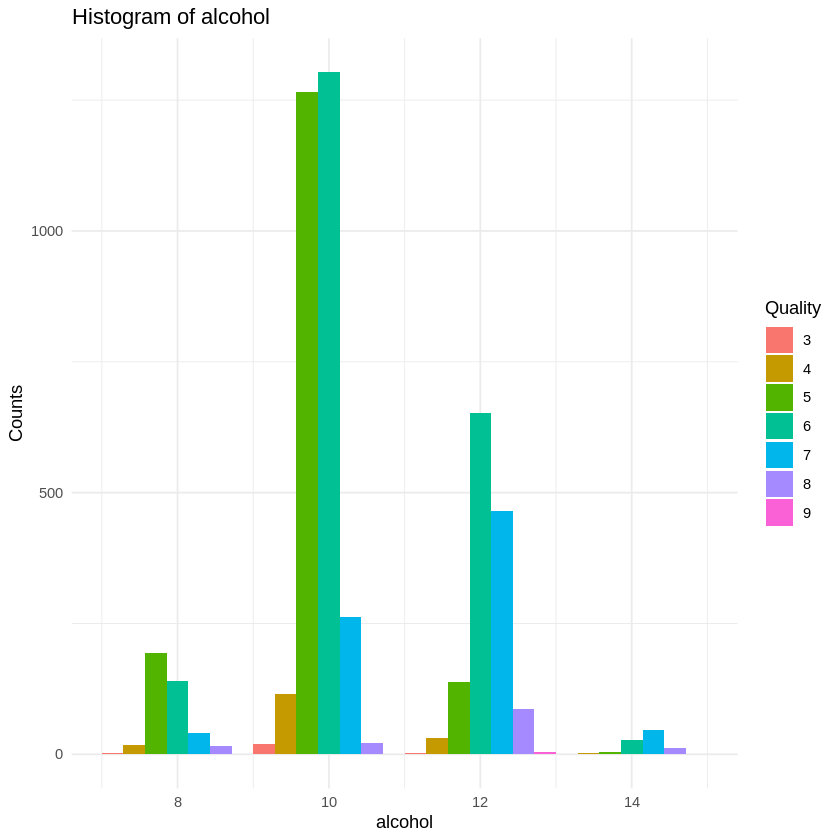

>>>>>>> remote


In [8]:
wine_filter <- wine_training |>
               select(-type)

histograms <- lapply(names(wine_filter)[!names(wine_filter) %in% c("quality")], function(col) {
  ggplot(wine_filter, aes(x = !!sym(col), fill = quality)) +
    geom_histogram(position = "dodge", bins = 100, binwidth = 2) +
    labs(title = paste("Histogram of", col), x = col, y = "Counts", fill = "Quality") +
    theme_minimal()
})

histograms

- Most variables have a linear negative correlation to quality
- free.sulfur.dioxide and total.sulfur. dioxide seems to have no correlation with quality as the categories' bins are layered in the histogram.
- alcohol and residual.sugar have a non-linear relationship with quality

## Regression Trainning & Evaluation

### The multivariable Linear regression Model

In [9]:
set.seed(1)
wine_data_reg <- wine_data |>
    mutate(quality = as.numeric(quality)) |>
    select(fixed.acidity, volatile.acidity, citric.acid, chlorides, density, pH, sulphates, quality)
head(wine_data_reg)

recipe <- recipe(quality ~ .,
                 data = wine_data_reg) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()
recipe

wine_scaled_reg <- bake(recipe, wine_data_reg)
wine_scaled_reg

wine_reg_split <- initial_split(wine_scaled_reg, prop = 0.75, strata = quality)
wine_reg_training <- training(wine_reg_split)
wine_reg_testing <- testing(wine_reg_split)

lm_recipe <- recipe(quality ~ .,
                    data = wine_reg_training)
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = wine_reg_training)

lm_fit

lm_test_results <- lm_fit |>
  predict(wine_reg_testing) |>
  bind_cols(wine_reg_testing) |>
  metrics(truth = quality, estimate = .pred)

lm_test_results

lm_coeffs <- lm_fit |>
             extract_fit_parsnip() |>
             tidy()
lm_coeffs

fixed.acidity volatile.acidity citric.acid chlorides density pH   sulphates
1  7.4          0.70             0.00        0.076     0.9978  3.51 0.56     
2  7.8          0.88             0.00        0.098     0.9968  3.20 0.68     
3  7.8          0.76             0.04        0.092     0.9970  3.26 0.65     
4 11.2          0.28             0.56        0.075     0.9980  3.16 0.58     
5  7.4          0.70             0.00        0.076     0.9978  3.51 0.56     
6  7.4          0.66             0.00        0.075     0.9978  3.51 0.56     
  quality
1 3      
2 3      
3 3      
4 4      
5 3      
6 3



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 7



── Training information 

Training data contained 6497 data points and no incomplete rows.



── Operations 

• Scaling for: fixed.acidity, volatile.acidity, citric.acid, ... | Trained

• Centering for: fixed.acidity, volatile.acidity, citric.acid, ... | Trained



fixed.acidity volatile.acidity citric.acid  chlorides  density    
1     0.14246230    2.1886645       -2.19266376  0.5699140   1.03491316
2     0.45100101    3.2819823       -2.19266376  1.1978825   0.70143232
3     0.45100101    2.5531038       -1.91740510  1.0266184   0.76812849
4     3.07358005   -0.3624106        1.66095741  0.5413699   1.10160933
5     0.14246230    2.1886645       -2.19266376  0.5699140   1.03491316
6     0.14246230    1.9457049       -2.19266376  0.5413699   1.03491316
7     0.52813569    1.5812656       -1.77977577  0.3701058   0.56803999
8     0.06532762    1.8849651       -2.19266376  0.2559297  -0.03222553
9     0.45100101    1.4597859       -2.05503443  0.4842819   0.70143232
10    0.21959698    0.9738668        0.28466414  0.4271938   1.03491316
11   -0.39748044    1.4597859       -1.64214645  1.1693385   0.40129956
12    0.21959698    0.9738668        0.28466414  0.4271938   1.03491316
13   -1.24596190    1.6723755       -2.19266376  0.9409863  -0.13226978
14    0.45100101    1.6420055       -0.19703851  1.6545869   0.90152083
15    1.29948246    1.7027454       -0.95399981  3.4243165   1.30169784
16    1.29948246    1.7027454       -0.88518515  3.2530523   1.30169784
17    0.99094375   -0.3624106        1.66095741  1.0266184   0.73478041
18    0.68240504    1.3383061       -0.26585317  8.9047693   0.70143232
19    0.14246230    1.5205258       -1.64214645  0.8553542   0.90152083
20    0.52813569   -0.1194510        1.31688409  8.1340806   0.73478041
21    1.29948246   -0.7268499        1.11044010  0.5984580   0.70143232
22    0.29673166    0.3057281       -0.05940918  0.7411781   1.16830550
23    0.52813569    0.5486877       -0.74755582  1.4262347   0.63473615
24    0.99094375    0.9131269       -1.43570245  0.7982662   0.70143232
25   -0.24321109    0.3664680       -1.22925846  0.8268102   0.70143232
26   -0.70601915    0.3057281       -1.09162914  0.6840901   0.26790723
27    0.29673166    0.4272079       -0.54111183  0.6840901   0.50134382
28    0.52813569    0.5486877       -0.74755582  1.4262347   0.63473615
29   -0.08894173    2.2494043       -2.19266376  0.6840901   0.83482466
30    0.45100101    1.8545951       -2.19266376  0.7411781   0.56803999
⋮    ⋮             ⋮                ⋮            ⋮          ⋮          
6468 -1.0916925    -0.666109987     -0.059409181 -0.2864068 -0.48575948
6469 -0.4746151    -0.605370106      0.078220146 -0.6860232  0.52135267
6470 -0.8602885    -0.119451050     -0.265853172 -1.0000074 -0.93929342
6471 -1.7087700    -0.848329633      0.559922792 -1.1712716 -1.66628166
6472 -0.9374232     0.487947769      0.628737456 -0.6860232  0.50801343
6473 -1.1688272    -0.787589751      0.009405483 -0.7431112 -1.41950584
6474 -1.2459619    -0.848329633      0.284664137 -0.2293188 -0.62582143
6475  0.1424623    -0.726849869     -0.403482499 -0.6003911 -0.74920934
6476 -0.7831538     0.244988242      0.697552120 -0.5147590 -1.12604270
6477 -1.0145579     1.216826353     -2.192663755 -0.6860232 -0.61248220
6478 -0.7831538     1.156086471     -2.055034428 -0.6003911 -0.78589224
6479 -0.4746151     0.002028714      0.559922792 -0.2864068  0.08115796
6480 -0.4746151     0.002028714      0.559922792 -0.2864068  0.08115796
6481 -1.7087700    -0.635740047     -0.334667836 -0.7431112  0.23455914
6482 -1.3230966    -0.119451050     -1.298073127 -0.5433030 -0.95263266
6483 -1.7859046     0.791647179     -1.022814473 -0.6003911 -1.68629051
6484 -0.5517498    -0.058711168      0.422293465 -0.2293188  0.07448834
6485 -0.4746151     0.002028714      0.559922792 -0.2864068  0.08115796
6486 -0.7831538    -0.787589751     -0.265853172 -0.8001993 -1.00598959
6487 -0.7831538     0.427207888     -0.678741154 -0.9429194 -1.80634361
6488 -0.3203458    -0.726849869      0.284664137 -0.1151427 -0.46575063
6489 -1.7859046    -0.635740047     -0.334667836 -0.7431112  0.23455914
6490 -0.8602885     0.002028714     -0.197038508 -0.5718471 -1.77299553
6491 -1.1688272    -0.787589751      0.009405

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)     fixed.acidity  volatile.acidity       citric.acid  
         3.81502           0.08707          -0.18997           0.01716  
       chlorides           density                pH         sulphates  
        -0.09946          -0.25886           0.07754           0.13857  


.metric .estimator .estimate
1 rmse    standard   0.8029350
2 rsq     standard   0.1667109
3 mae     standard   0.6274215

term             estimate    std.error  statistic  p.value     
1 (Intercept)       3.81501672 0.01134216 336.357069 0.000000e+00
2 fixed.acidity     0.08707008 0.01508388   5.772391 8.300219e-09
3 volatile.acidity -0.18996941 0.01483134 -12.808650 5.769663e-37
4 citric.acid       0.01716328 0.01396913   1.228658 2.192596e-01
5 chlorides        -0.09945725 0.01369697  -7.261260 4.443233e-13
6 density          -0.25886222 0.01328623 -19.483504 1.800172e-81
7 pH                0.07753980 0.01312903   5.905982 3.743811e-09
8 sulphates         0.13857399 0.01300352  10.656649 3.154270e-26

The mathematical expression to describe this linear regression model is:
$quality = 3.81501672 + 0.08707008 \cdot (fixed.acidity) - 0.18996941 \cdot (volatile.acidity) + 0.01716328 \cdot (citric.acid) - 0.09945725 \cdot (chlorides) - 0.25886222 \cdot (density) + 0.07753980 \cdot (pH) + 0.13857399 \cdot (sulphates)$

## Methods

- After data reading and wrangling, we used all 12 variables for preliminary data summarization and visualization. We then compared the number of observations in each red/ white wine class, the number of observations in each quality level for red and white wine respectively, and the mean value of each feature for each quality level. 

- Multi-histogram is used to visualize the relationship between each variable and the wine quality, each with one predictor on the x axis, counts on the y axis, and color indicating the different quality levels. If each quality level tends to show up on a certain value of the x axis, we can conclude that there is linear correlation between the wine quality and that predictor. Otherwise, there is no correlation or non-linear correlation. 

- **We will only use 7 numeric variables excluding type total.sulfur.dioxide, free.sulfur.dioxide, residual sugar and alcohol** 

## Expected outcomes and significance

- Due to class imbalance in the categories of the target column (quality): some of the categories are missing. We expect the model will be less precise for the level from 0 to 2 and the level 10.
- However, we hope the model will be able to predict correctly the quality from 3 - 8

- These findings will allow a more efficient and more systematic wine quality assessment as we will be able assess the quality of the wines not only by its age or individual tastes, but also the actual content in the wine itself.
-  The findings can also lead to further discoveries such as how different environments in which the grapes grew in would affect the quality of the wines, in which they can be used to optimize the wine development.


## Classification Model

In [10]:
wine_data_class <- wine_data |>
    select(fixed.acidity, volatile.acidity, citric.acid, chlorides, density, pH, sulphates, quality)

wine_data_class$quality <- as.factor(wine_data_class$quality)

In [11]:
set.seed(1)
wine_class_split <- initial_split(wine_data_class, prop = 0.75, strata = quality)
wine_class_training <- training(wine_class_split)
wine_class_testing <- testing(wine_class_split)

knn_recipe <- recipe(quality ~ ., data = wine_class_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec)

knn_res <- tune_grid(
    knn_workflow,
    resamples = vfold_cv(wine_class_training, v = 5),
    grid = data.frame(neighbors = seq(1, 50, 5))
)

best_k <- knn_res |>
    select_best("accuracy")

knn_final <- finalize_workflow(knn_workflow, best_k)

knn_fit <- fit(knn_final, data = wine_class_training)

knn_pred <- predict(knn_fit, new_data = wine_class_testing) |>
    bind_cols(wine_class_testing)

accuracy(knn_pred, truth = quality, estimate = .pred_class)

knn_pred_num <- knn_pred |>
    mutate(quality_num = as.numeric(quality),
            .pred_class_num = as.numeric(.pred_class))

knn_rmse <- rmse(knn_pred_num, truth = quality_num, estimate = .pred_class_num)

knn_rmse

→ A | warning: No observations were detected in `truth` for level(s): '9'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2





.metric  .estimator .estimate
1 accuracy multiclass 0.603936

.metric .estimator .estimate
1 rmse    standard   0.849354